In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data
df = pd.read_csv('events.csv')
# Remove TBD
mask = (df['year'] != 'TBD') & (df['country'].isin(['United States', 'Brazil',  'Canada', 'Poland', 'Switzerland']))
df = df[mask]
df.head()

,month,year,city,country
0,MARCH,2024,Salt Lake City,United States
1,MARCH,2024,Los Angeles,United States
2,MARCH,2024,Kraków,Poland
4,APRIL,2024,Goiânia,Brazil
5,APRIL,2024,Raleigh,United States


In [3]:
# Fix types
# df[['month', 'city', 'country']] = df[['month', 'city', 'country']].astype('category')
df.year = df.year.astype('int')
# Select year bigger than 2016
mask = df.year >= 2016
df = df[mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 531
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    21 non-null     object
 1   year     274 non-null    int32 
 2   city     274 non-null    object
 3   country  274 non-null    object
dtypes: int32(1), object(3)
memory usage: 9.6+ KB


In [21]:
df_yar_country = df[['year', 'city', 'country']]
df_yar_country = df_yar_country.groupby(['year', 'country']).count().reset_index()
df_yar_country.rename(columns={'city': 'count'}, inplace=True)
# df_yar_country.sort_values(by=['count'], ascending=False, inplace=True)
# df_yar_country = df_yar_country.nlargest(10, 'count')
# df_yar_country['line_style'] = df_yar_country.country.apply(lambda x: '-.' if x == 'Brazil' else '-')
df_yar_country.head()

,year,country,count
0,2016,Brazil,2
1,2016,Canada,2
2,2016,Poland,1
3,2016,United States,22
4,2017,Brazil,3


['#3a923a', '#c03d3e', '#e1812c', '#3274a1', '#9372b2']


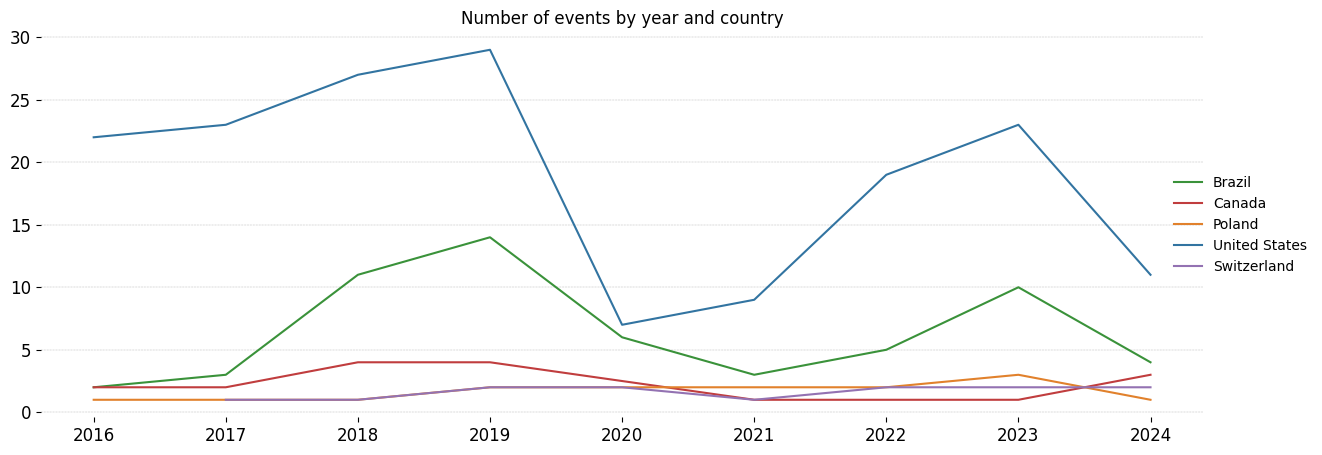

In [125]:
custom_colors = {'United States': "#3274a1", 'Brazil': "#3a923a", 'Canada': "#c03d3e", 'Poland': "#e1812c", 'Switzerland': "#9372b2"}
fig, ax = plt.subplots(figsize=(15, 5))
df_yar_country['color'] = df_yar_country.country.map(custom_colors)
sns.lineplot(x='year', y='count', hue='country', data=df_yar_country, ax=ax, palette=['#3a923a', '#c03d3e', '#e1812c', '#3274a1', '#9372b2'])
ax.set(xlabel='', ylabel='', title='Number of events by year and country')
# Legend right, no box
ax.legend(loc='center right', bbox_to_anchor=(1.1, .5), frameon=False)
# Remove borders
sns.despine(bottom=True, left=True)
# Add y grid lines
ax.yaxis.grid(True, color='gray', linestyle='-.', linewidth=0.2)
# Xticks and y ticks font size
ax.tick_params(axis='both', which='major', labelsize=12)
# print list o legend labes
print([custom_colors[key] for key in ax.get_legend_handles_labels()[1]])
plt.show()

# Save figure as svg
fig.savefig('events_by_year_country.svg', bbox_inches='tight', dpi=900)

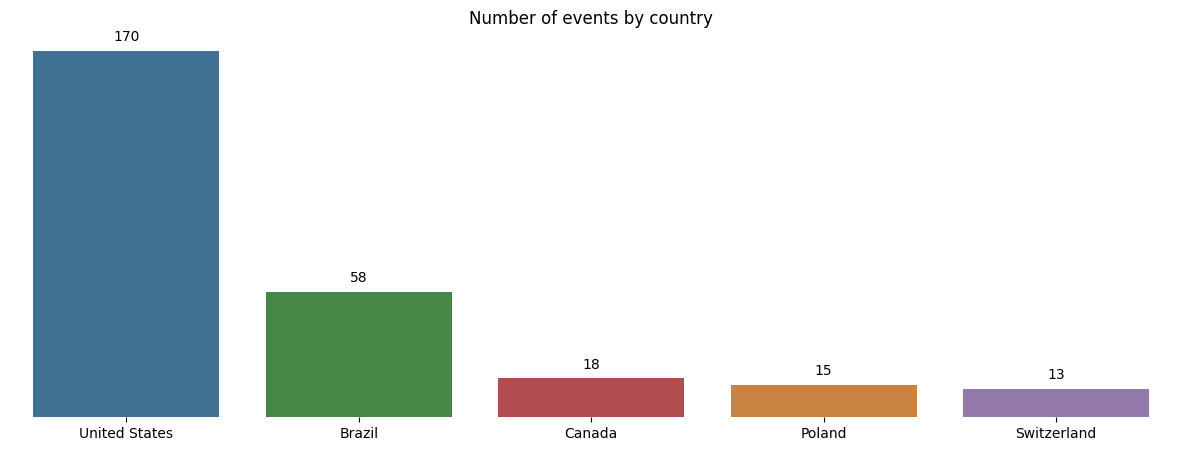

In [126]:
custom_colors = {'United States': "#3274a1", 'Brazil': "#3a923a", 'Canada': "#c03d3e", 'Poland': "#e1812c", 'Switzerland': "#9372b2"}
df_sum_country = df_yar_country.groupby(['country'])['count'].sum().reset_index().sort_values(by=['count'], ascending=False)
df_sum_country['color'] = df_sum_country['country'].map(custom_colors)

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='country', y='count', hue='country', data=df_sum_country, ax=ax, palette=df_sum_country['color'].to_list())
ax.set(xlabel='', ylabel='', title='Number of events by country')
# Remove borders
sns.despine(bottom=True, left=True)
# show values over bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='center', xytext=(0, 10), textcoords='offset points')
ax.set_yticks([])
plt.show()

# Save figure as svg
fig.savefig('events_by_country.svg', bbox_inches='tight', dpi=900)

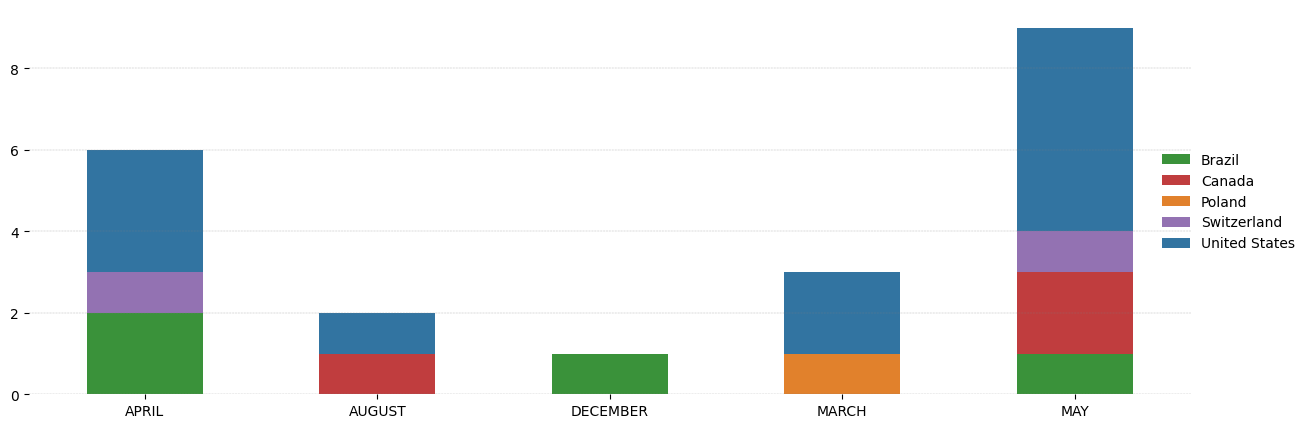

In [127]:
custom_colors = ['#3a923a', '#c03d3e', '#e1812c', '#9372b2', '#3274a1']
mask = df.month.isnull()
df_by_month = df[~mask]
df_by_month = df_by_month.groupby(['month', 'country'])['city'].count().to_frame().reset_index('country').pivot(columns='country', values='city').fillna(0)
fig, ax = plt.subplots(figsize=(15, 5))
df_by_month.plot(kind='bar', stacked=True, ax=ax, color=custom_colors)
ax.legend(loc='center right', bbox_to_anchor=(1.1, .5), frameon=False)
# Despine
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
# order xticks as: JANUARY, FEBRUARY, MARCH, APRIL, MAY, JUNE, JULY, AUGUST, SEPTEMBER, OCTOBER, NOVEMBER, DECEMBER
# ax.set_xticks(range(12))
# ax.set_xticklabels(["JANUARY", "FEBRUARY", "MARCH", "APRIL", "MAY", "JUNE", "JULY", "AUGUST", "SEPTEMBER", "OCTOBER", "NOVEMBER", "DECEMBER"])
# Rotate xticks 90 degrees
plt.xticks(rotation=0)
# Remoxe x Label
plt.xlabel('')
# Show gridline
ax.yaxis.grid(True, color='gray', linestyle='-.', linewidth=0.2)


plt.show()
# Save figure as svg
fig.savefig('events_by_month.svg', bbox_inches='tight', dpi=900)